# 線性回歸
* 學函數的概念
* #機器學習，要開空的機器，語法:變數名稱 = LR()
* regr.fit()  regr.predict()
* training data用來訓練機器人，Testing Data用來測試回歸模型
* from sklearn.model_selection import train_test_split
* 使用方法:輸入訓練,輸入測試,輸出訓練,輸出測試=train_test_split(x,y,test_size=分割給test的比例,random_state=隨便給數字)

* enumerate就是計算list中的東西數量
* 其他相同寫法: for i in range(3): print(i+1,L[i])
* 寫法 : for i , s in en..(L) : print(i+1,s)

* 高級寫法: enumerate(list)  en會把list的index 和list的item包成一個tuple，然後再把每個tuple包成按inedex順序的tuple



In [21]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact

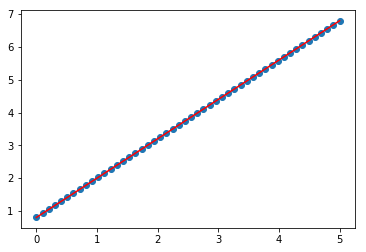

In [4]:
# 準備模擬資料  f(x)=1.2x+0.8
x = np.linspace(0,5,50)
y = 1.2*x+0.8
plt.scatter(x,y)
plt.plot(x,y,'r')

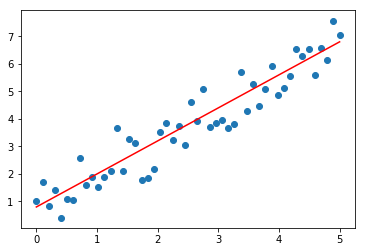

In [8]:
# noise的概念就是真實函數再加上偏差項
y = 1.2*x + 0.8 + np.random.randn(50)*0.6
plt.scatter(x,y)
plt.plot(x,1.2*x+0.8,'r')
# 目標就是要找到那條直線

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
regr = LinearRegression()   #機器學習，要開空的機器，語法:變數名稱 = LR()

In [14]:
X = x.reshape(50,1)

In [16]:
regr.fit(X, y)  #機器變數名稱.fit(輸入資料,答案)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
Y = regr.predict(X)   #開始預測的方法: 變數.predict(輸入資料)

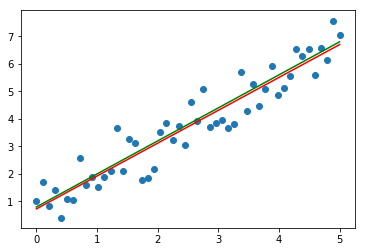

In [20]:
plt.scatter(x,y)
plt.plot(x,Y,'r')
plt.plot(x,1.2*x+0.8,'g')

In [28]:
X = np.linspace(0,5,1000)

def m(n):
    Y = 4*np.sin(n*X) + 4
    plt.scatter(x,y)
    plt.plot(X,Y,'r')
    plt.show()
    

In [29]:
interact(m , n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.m(n)>

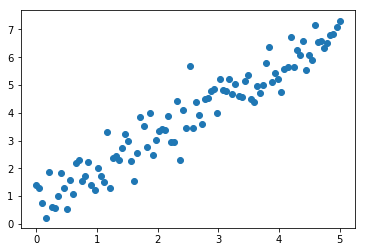

In [30]:
x = np.linspace(0,5,100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)
plt.scatter(x,y)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 87)

In [35]:
len(x_train)
len(x_test)

20

In [36]:
x_train = x_train.reshape(80,1)
x_test.shape = (20,1)

In [37]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [38]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

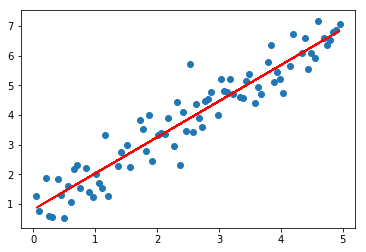

In [39]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regr.predict(x_train),'r')

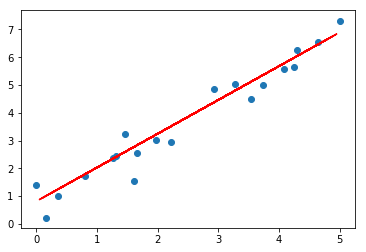

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_train,regr.predict(x_train),'r')

In [41]:
from sklearn.datasets import load_boston

In [42]:
boston = load_boston()

In [43]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [44]:
X = boston.data
Y = boston.target

In [45]:
len(X)

506

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 87)

In [47]:
regr = LinearRegression()

In [48]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
y_prdict = regr.predict(x_test)

Text(0, 0.5, 'Predicted Price')

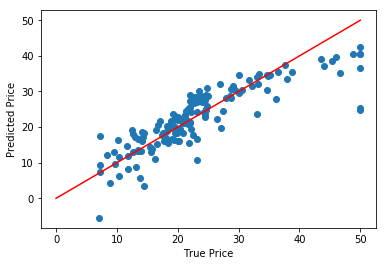

In [50]:
plt.scatter(y_test,y_prdict)
plt.plot([0,50],[0,50],'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

In [51]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

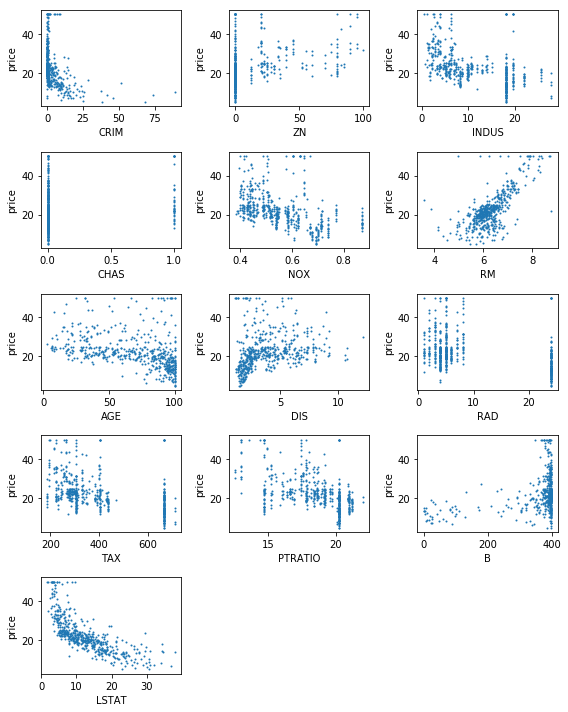

In [52]:
plt.figure(figsize = (8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5,3,i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel('price')
    plt.xlabel(feature)
    plt.tight_layout()